## Unveiling LSTMs

LSTMs, or Long Short-Term Memory units, are a type of recurrent neural network (RNN) designed to recognize patterns in sequences. Using PyTorch, a popular open-source machine learning library, we can easily implement and train these powerful sequence models.

## Part 1:  Data Preparation for Sequential Predictive Modeling

We will use Fitbit refined dataset: https://www.kaggle.com/datasets/athul3000/fitbit-refined-data for this exercise. For the purposes of demonstartion, Hourlymerged.csv data, which is hourly aggregated data related to physical activities and metrics such as Calories, TotalIntensity, AverageIntensity and Step-Total, would be used. 

## Data Exploration

We start with Summary Statistics. In the context of data analysis, using summary statistics is a foundational step. They allow you to quickly grasp the main features of your data before diving into more detailed analysis or modeling.

## Summary Statistics

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Hourly_merged.csv' 
df = pd . read_csv ( file_path )

# Display summary statistics
df . describe ()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


## Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, it provides an accessible way to see and understand patterns, outliers, and trends in data.

For this exercise, we would visualize some time series plots and then some histograms (to observe distributions).

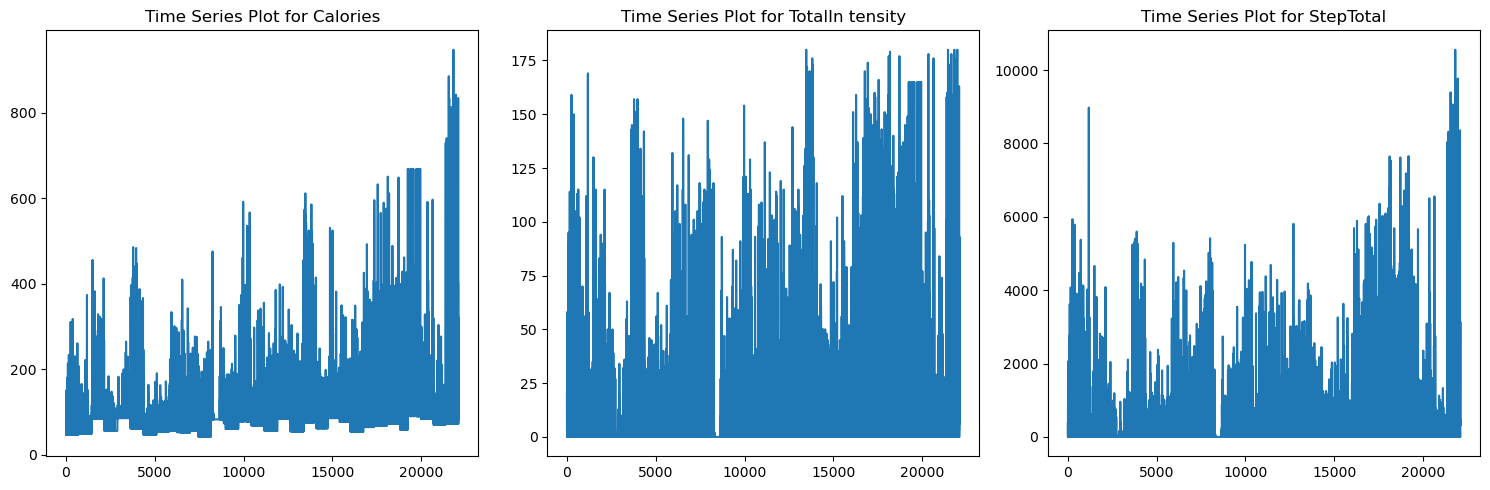

In [2]:
#Import necessary libraries
import matplotlib . pyplot as plt

# Time series plots
plt . figure ( figsize =(15 , 5) )

# Plot for Calories
plt . subplot (1 , 3 , 1)
plt . plot ( df ['Calories'])
plt . title ( 'Time Series Plot for Calories')

# Plot for TotalInten sity
plt . subplot (1 , 3 , 2)
plt . plot ( df ['TotalIntensity'])
plt . title ( 'Time Series Plot for TotalIn tensity')

# Plot for StepTotal
plt . subplot (1 , 3 , 3)
plt . plot ( df ['StepTotal'])
plt . title ('Time Series Plot for StepTotal')

plt . tight_layout ()

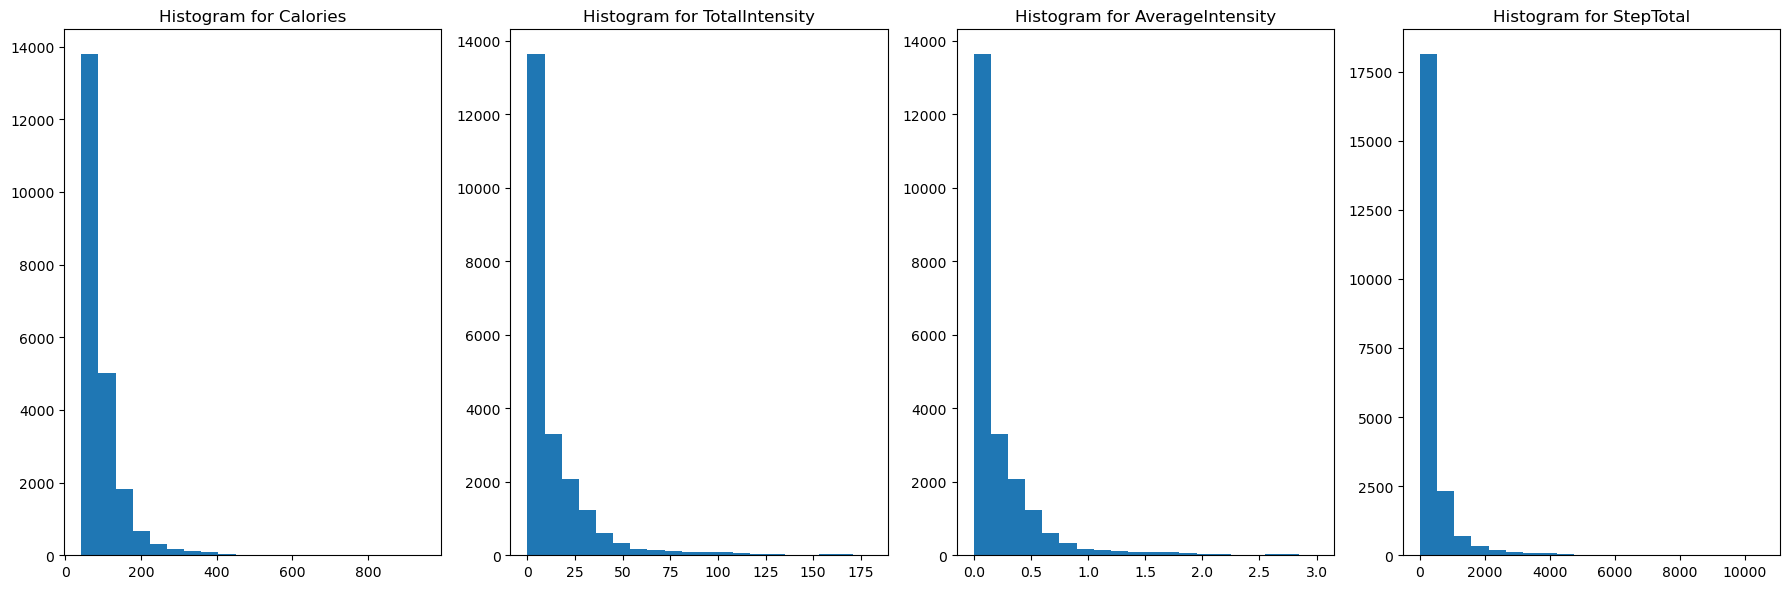

In [3]:
 #Histograms to observe distributions
plt . figure ( figsize =(18 , 6) )

# Histogram for Calories
plt . subplot (1 , 4 , 1)
plt . hist ( df ['Calories'] , bins =20)
plt . title ('Histogram for Calories')

# Histogram for TotalIntensity
plt . subplot (1 , 4 , 2)
plt . hist ( df ['TotalIntensity'] , bins =20)
plt . title ('Histogram for TotalIntensity')

# Histogram for Average Intensity
plt . subplot (1 , 4 , 3)
plt . hist ( df ['AverageIntensity'] , bins =20)
plt . title ('Histogram for AverageIntensity')

# Histogram for StepTotal
plt . subplot (1 , 4 , 4)
plt . hist ( df ['StepTotal'] , bins =20)
plt . title ('Histogram for StepTotal')

plt . tight_layout ()
plt . show ()

## Data Preprocessing

Data preprocessing is the act of cleaning and transforming raw data into a format suitable for analysis or modeling. This often includes handling missing values, normalizing data, and encoding categorical variables.

The first step in data preprocessing is to identify and handle any missing values. 

## Missing Value Treatment

Missing value treatment involves identifying, assessing, and addressing data gaps or null values in a dataset. Common strategies include imputation, deletion, or using algorithms robust to missing data.

In [14]:
# Check for missing values
df.isnull().sum ()

Id                  0
time                0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64

Hourly_merged.csv has no missing values

## Data Scaling/Normalization

Data scaling or normalization adjusts the range of feature values to ensure consistency, often converting them to a standard scale (e.g., 0 to 1). This aids in faster convergence and improved performance in many algorithms.

Min-Max scaling is a commonly used data scaling method. Min-Max Scaling is a method to resize features into a specific range, typically [0, 1]. It's calculated using the formula:
Scaled Value=(Value−Min)/(Max−Min)
This ensures that the scaled data retains its original distribution while being bounded within the set range.

In [4]:
# Import MinMaxScaler
from sklearn . preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler ()

# Fit and transform the dataset
df_scaled = pd . DataFrame ( scaler . fit_transform ( df [['Calories','TotalIntensity','AverageIntensity','StepTotal']]) , columns =['Calories', 'TotalIntensity','AverageIntensity','StepTotal'])

# Display the first few rows of the scaled dataset
df_scaled . head ()


,Calories,TotalIntensity,AverageIntensity,StepTotal
0,0.043046,0.111111,0.111111,0.035342
1,0.020971,0.044444,0.044444,0.015160
2,0.018764,0.038889,0.038889,0.014307
3,0.005519,0.000000,0.000000,0.000000
4,0.006623,0.000000,0.000000,0.000000
